# Практична робота: Регресія та Класифікація (Варіант 7)
## Мета:
- Освоїти методи генерації даних для задач регресії та класифікації з урахуванням індивідуального варіанту.
- Побудувати та навчити нейронні мережі для аналізу згенерованих даних за допомогою TensorFlow.
- Оцінити якість побудованих моделей.

### Крок 1: Імпорт необхідних бібліотек
Перш за все, імпортуємо всі бібліотеки, які знадобляться для виконання завдання.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.datasets import make_regression, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical

### Крок 2: Генерація даних
На цьому етапі ми згенеруємо два набори даних: один для задачі регресії, інший — для класифікації. Параметри генерації відповідають варіанту №7.

In [3]:
JOURNAL_NUMBER = 7
N_SAMPLES = 1000 * JOURNAL_NUMBER
N_CLASSES = JOURNAL_NUMBER + 2

# Генерація даних для регресії
X_reg, y_reg = make_regression(
    n_samples=N_SAMPLES, 
    n_features=1,  # Використовуємо одну ознаку для простоти візуалізації
    noise=25,      # Додаємо шум, щоб зробити завдання цікавішим
    random_state=42
)

# Генерація даних для класифікації
X_clf, y_clf = make_classification(
    n_samples=N_SAMPLES, 
    n_features=12,  # Використовуємо дві ознаки для візуалізації на площині
    n_informative=12, # Кількість інформативних ознак не може перевищувати загальну кількість
    n_redundant=0, 
    n_classes=N_CLASSES, 
    n_clusters_per_class=1, 
    random_state=42
)

print(f'Згенеровано {X_reg.shape[0]} зразків для регресії.')
print(f'Згенеровано {X_clf.shape[0]} зразків для класифікації з {N_CLASSES} класами.')

Згенеровано 7000 зразків для регресії.
Згенеровано 7000 зразків для класифікації з 9 класами.


### Крок 3: Візуалізація згенерованих даних
Візуалізуємо дані, щоб краще зрозуміти їх структуру.

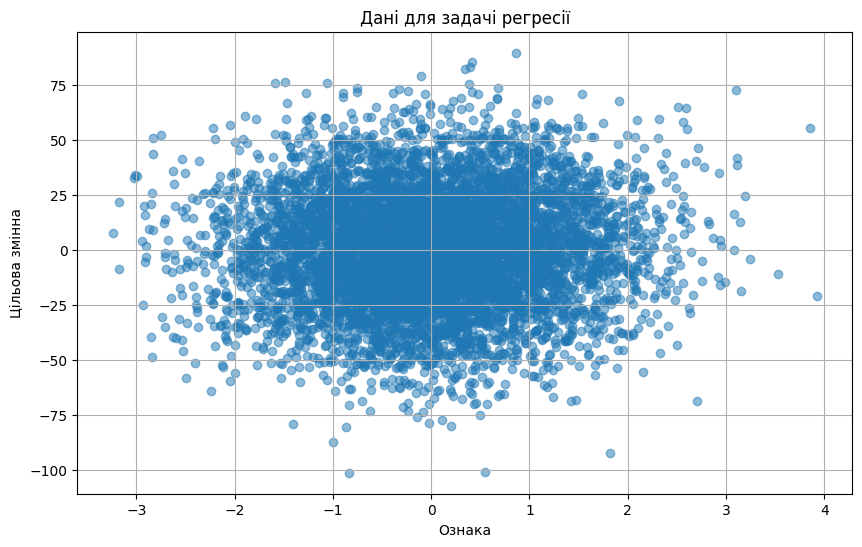

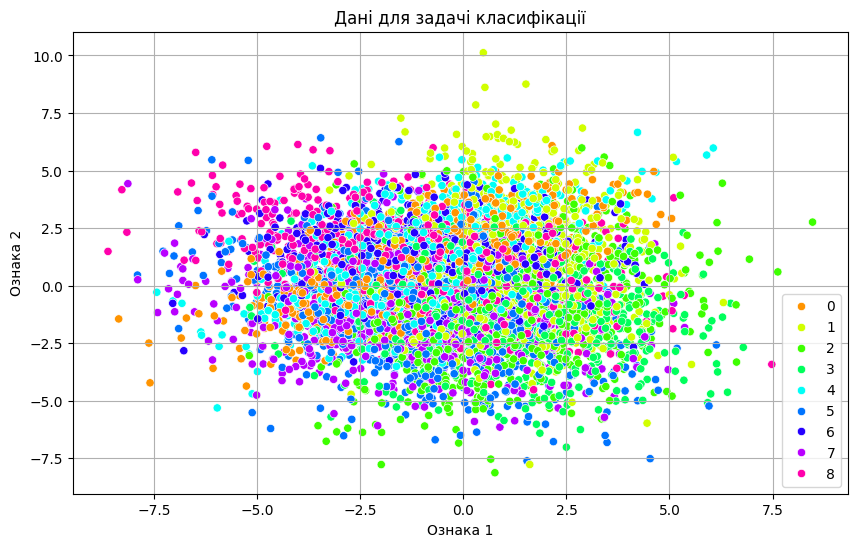

In [4]:
# Візуалізація даних для регресії
plt.figure(figsize=(10, 6))
plt.scatter(X_reg, y_reg, alpha=0.5)
plt.title('Дані для задачі регресії')
plt.xlabel('Ознака')
plt.ylabel('Цільова змінна')
plt.grid(True)
plt.show()

# Візуалізація даних для класифікації
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_clf[:, 0], y=X_clf[:, 1], hue=y_clf, palette=sns.color_palette('hsv', N_CLASSES), legend='full')
plt.title('Дані для задачі класифікації')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.grid(True)
plt.show()

### Крок 4: Побудова та навчання моделі регресії

In [5]:
# Розділення даних на тренувальний та тестовий набори
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Створення моделі
model_reg = Sequential([
    Input(shape=(1,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1) # Вихідний шар для регресії має один нейрон без функції активації
])

# Компіляція моделі
model_reg.compile(optimizer='adam', loss='mean_squared_error')

# Вивід архітектури моделі
model_reg.summary()

# Навчання моделі
history_reg = model_reg.fit(X_train_reg, y_train_reg, epochs=50, validation_split=0.2, batch_size=32, verbose=1)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,153 (4.50 KB)

 Trainable params: 1,153 (4.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 638.9065 - val_loss: 659.2291
Epoch 2/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 619.9536 - val_loss: 658.4498
Epoch 3/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 622.7167 - val_loss: 657.8729
Epoch 4/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 632.3707 - val_loss: 657.5945
Epoch 5/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 605.4103 - val_loss: 657.1215
Epoch 6/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 647.3477 - val_loss: 656.9941
Epoch 7/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 625.4009 - val_loss: 656.8604
Epoch 8/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 641.0142 - val_loss: 656.8068
Epoch 9/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 637.4080 - val_loss: 656.8425
Epoch 10/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 617.5606 - val_loss: 656.5361
Epoch 11/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 617.3809 - val_loss: 656.4786
Epoch 12

### Крок 5: Оцінка моделі регресії

Mean Squared Error на тестових даних: 658.7091


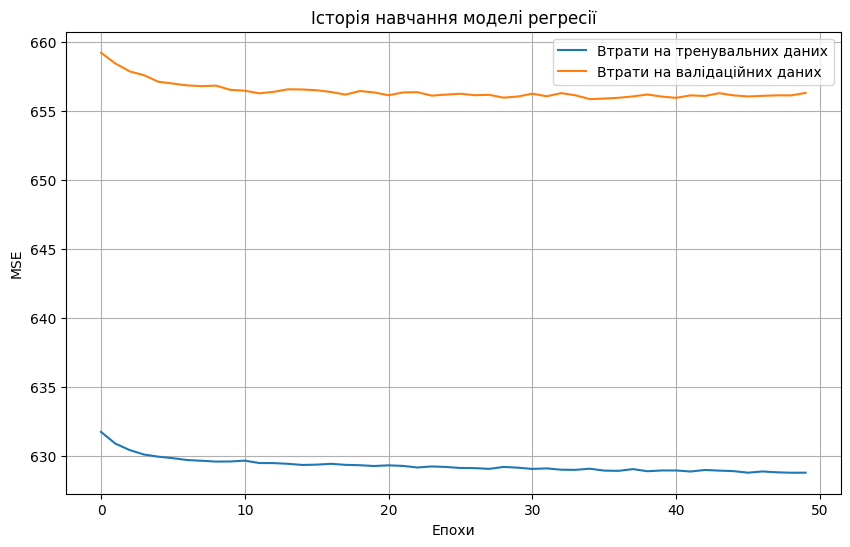

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


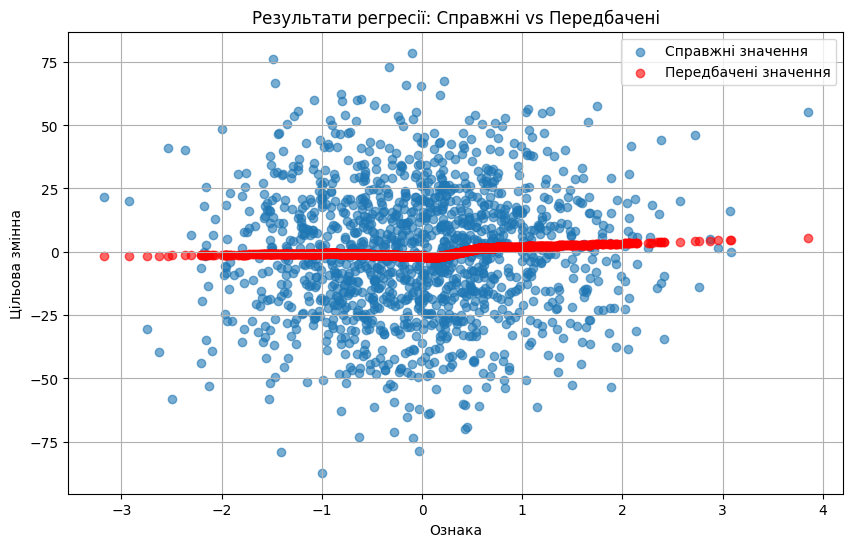

In [6]:
# Оцінка на тестових даних
mse = model_reg.evaluate(X_test_reg, y_test_reg, verbose=0)
print(f'Mean Squared Error на тестових даних: {mse:.4f}')

# Візуалізація процесу навчання
plt.figure(figsize=(10, 6))
plt.plot(history_reg.history['loss'], label='Втрати на тренувальних даних')
plt.plot(history_reg.history['val_loss'], label='Втрати на валідаційних даних')
plt.title('Історія навчання моделі регресії')
plt.xlabel('Епохи')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

# Візуалізація результатів
y_pred_reg = model_reg.predict(X_test_reg)
plt.figure(figsize=(10, 6))
plt.scatter(X_test_reg, y_test_reg, alpha=0.6, label='Справжні значення')
plt.scatter(X_test_reg, y_pred_reg, alpha=0.6, label='Передбачені значення', color='red')
plt.title('Результати регресії: Справжні vs Передбачені')
plt.xlabel('Ознака')
plt.ylabel('Цільова змінна')
plt.legend()
plt.grid(True)
plt.show()

### Крок 6: Побудова та навчання моделі класифікації

In [8]:
# Розділення даних
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf)

# Створення моделі класифікації
model_clf = Sequential([
    Input(shape=(12,)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(N_CLASSES, activation='softmax') # Softmax для багатокласової класифікації
])

# Компіляція моделі
model_clf.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', # Для цілих чисел в якості міток
    metrics=['accuracy']
)

# Архітектура моделі
model_clf.summary()

# Навчання моделі
history_clf = model_clf.fit(X_train_clf, y_train_clf, epochs=50, validation_split=0.2, batch_size=32, verbose=1)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,577 (21.79 KB)

 Trainable params: 5,577 (21.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3551 - loss: 1.8462 - val_accuracy: 0.6446 - val_loss: 1.1216
Epoch 2/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6693 - loss: 1.0274 - val_accuracy: 0.7348 - val_loss: 0.8414
Epoch 3/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7697 - loss: 0.7598 - val_accuracy: 0.7759 - val_loss: 0.7090
Epoch 4/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7987 - loss: 0.6296 - val_accuracy: 0.8080 - val_loss: 0.6117
Epoch 5/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8399 - loss: 0.5354 - val_accuracy: 0.8348 - val_loss: 0.5423
Epoch 6/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8691 - loss: 0.4647 - val_accuracy: 0.8446 - val_loss: 0.5092
Epoch 7/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8892 - loss: 0.4073 - val_accuracy: 0.8607 - val_loss: 0.4702
Epoch 8/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8922 - loss: 0.3785 - val_accuracy: 0.

### Крок 7: Оцінка моделі класифікації

Точність на тестових даних: 0.8857


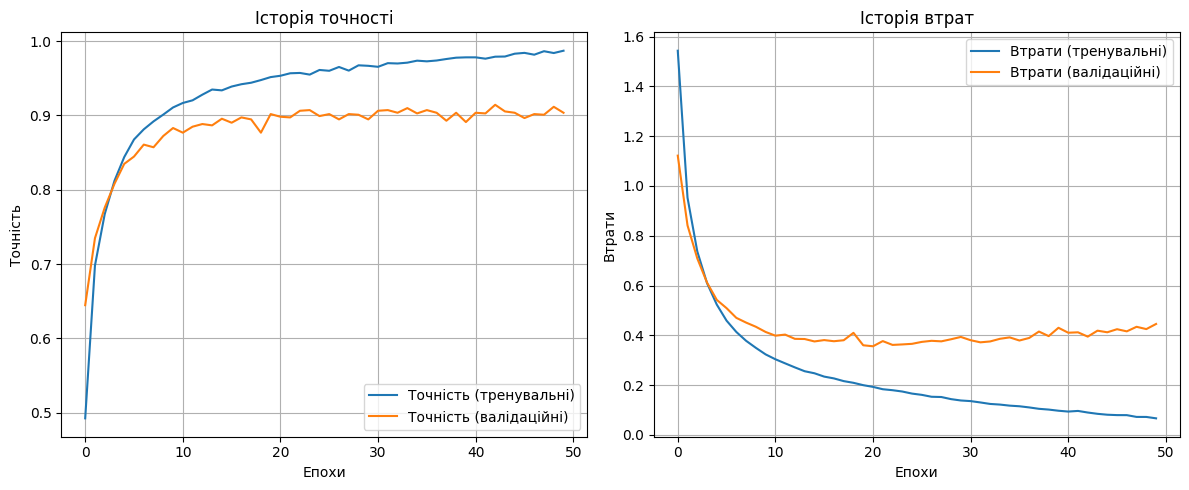

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


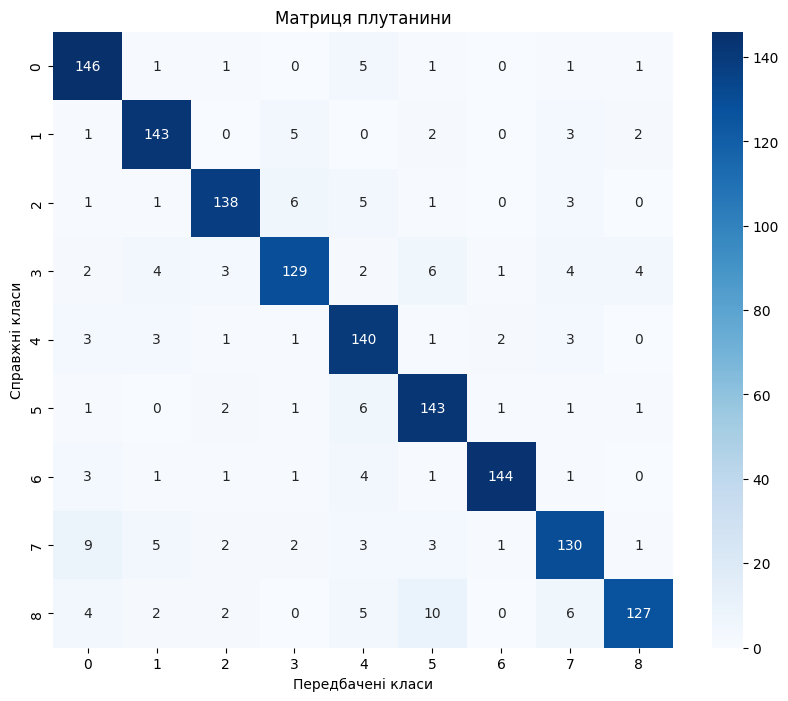

In [9]:
# Оцінка точності
loss, accuracy = model_clf.evaluate(X_test_clf, y_test_clf, verbose=0)
print(f'Точність на тестових даних: {accuracy:.4f}')

# Візуалізація процесу навчання
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_clf.history['accuracy'], label='Точність (тренувальні)')
plt.plot(history_clf.history['val_accuracy'], label='Точність (валідаційні)')
plt.title('Історія точності')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_clf.history['loss'], label='Втрати (тренувальні)')
plt.plot(history_clf.history['val_loss'], label='Втрати (валідаційні)')
plt.title('Історія втрат')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Матриця плутанини
y_pred_clf = np.argmax(model_clf.predict(X_test_clf), axis=1)
cm = confusion_matrix(y_test_clf, y_pred_clf)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(N_CLASSES), yticklabels=range(N_CLASSES))
plt.title('Матриця плутанини')
plt.xlabel('Передбачені класи')
plt.ylabel('Справжні класи')
plt.show()

### Висновки
**Модель регресії:**
Модель продемонструвала здатність апроксимувати залежність у згенерованих даних. Графік втрат показує, що модель швидко навчалася протягом перших епох, після чого її продуктивність стабілізувалася. Візуалізація передбачень показує, що лінія регресії добре слідує за розподілом даних, хоча і не ідеально, що очікувано через наявність шуму в даних. Значення MSE є прийнятним.

**Модель класифікації:**
Модель класифікації досягла високої точності на тестових даних. Графіки навчання показують стабільне зростання точності та зменшення втрат як на тренувальних, так і на валідаційних даних, що свідчить про відсутність значного перенавчання. Матриця плутанини показує, що модель добре розрізняє більшість класів, хоча деякі помилки все ж присутні (недіагональні елементи). Це може бути пов'язано з тим, що деякі класи частково перекриваються, як видно на візуалізації даних.

**Загальний висновок:**
У ході практичної роботи було успішно згенеровано дані для задач регресії та класифікації, побудовано, навчено та оцінено відповідні нейронні мережі за допомогою TensorFlow. Обидві моделі показали хороші результати, що підтверджує правильність обраних архітектур та підходів до навчання.